## Feature Engineering
### @cipher499
### 12/12/23

In [63]:
import pandas as pd
import numpy as np
import re

In [64]:
# setting to display all the columns and rows in the data# 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [65]:
# load the data into a dataframe
df = pd.read_csv('gurgaon_properties_cleaned.csv')

In [66]:
# check for duplicate rows
df.duplicated().sum()

122

In [67]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,additional_room,floor_num,facing,age_possession,nearby_locations,furnish_details,features
0,flat,m3m heights,sector 65,2.5,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,not available,19.0,NaN,2024-12-01 00:00:00,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN


### 1. Area with type

In [68]:
df[['area', 'areaWithType']].sample(5)

,area,areaWithType
1743,2040.0,Built Up area: 2040 (189.52 sq.m.)
466,1736.0,Carpet area: 180 (150.5 sq.m.)
1074,1165.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)
3447,240.0,Built Up area: 240 (22.3 sq.m.)
2192,1997.0,Super Built up area 1997(185.53 sq.m.)Built Up area: 1790 sq.ft. (166.3 sq.m.)Carpet area: 1420 sq.ft. (131.92 sq.m.)


#### *carpet area -> usable area of a property; excludes the thickness of the walls, for example*
#### *built-up area -> usable area but also includes the wall thickness and area of other structural elements*
#### *super built-up area -> total area of a property including balconies, verandah, etc.*

In [69]:
def get_super_built_up_area(text):
    """
    a function that takes a description of the areaWithType as input
    and returns the value of Super Built up area if found
    """
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    
    return None

def get_area(text, area_type):
    """
    a function that takes a description of the areaWithType and area type
    as input and returns the value of area type if found
    """
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    
    return None

def convert_to_sqft(text, area_value):
    """
    a function that converts
    """
    if area_value is None:
        return None
    
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639 # conversion factor (sq.m to sq.ft)
    
    return area_value

In [70]:
# extract super built up area and convert to sqft
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# extract built up area and convert to sqft
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# extract super carpet area and convert to sqft
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [71]:
df[['property_type', 'price', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1065,flat,1.65,1877.0,Super Built up area 1877(174.38 sq.m.),1877.0,NaN,NaN
1118,house,3.99,4500.0,Plot area 4500(418.06 sq.m.),NaN,NaN,NaN
1616,flat,1.35,1359.0,Super Built up area 1359(126.26 sq.m.),1359.0,NaN,NaN
3310,flat,0.54,830.0,Carpet area: 830 (77.11 sq.m.),NaN,NaN,830.0
97,flat,1.50,2125.0,Super Built up area 2125(197.42 sq.m.),2125.0,NaN,NaN


In [72]:
# all the rows in which none of the three area columns are null
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['property_type', 'price', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3507,flat,1.50,1765.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1480 sq.ft. (137.5 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),1750.0,1480.0,1450.00
2207,flat,1.60,1910.0,Super Built up area 1910(177.44 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),1910.0,1700.0,1600.00
3486,flat,1.83,2405.0,Super Built up area 2408(223.71 sq.m.)Built Up area: 1925 sq.ft. (178.84 sq.m.)Carpet area: 1875 sq.ft. (174.19 sq.m.),2408.0,1925.0,1875.00
353,flat,2.00,1128.0,Super Built up area 1852(172.06 sq.m.)Built Up area: 1456 sq.ft. (135.27 sq.m.)Carpet area: 1128.09 sq.ft. (104.8 sq.m.),1852.0,1456.0,1128.09
2614,flat,4.55,4550.0,Super Built up area 4650(432 sq.m.)Built Up area: 4630 sq.ft. (430.14 sq.m.)Carpet area: 4550 sq.ft. (422.71 sq.m.),4650.0,4630.0,4550.00


In [73]:
# all the rows in which the area description contains Plot area
df[df['areaWithType'].str.contains('Plot')][['property_type', 'price', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1175,house,8.50,4518.0,Plot area 502(419.74 sq.m.)Built Up area: 500 sq.yards (418.06 sq.m.)Carpet area: 400 sq.yards (334.45 sq.m.),NaN,500.0,400.0
3333,house,1.30,1152.0,Plot area 1152(107.02 sq.m.),NaN,NaN,NaN
1940,house,10.75,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
3172,house,16.00,4500.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
2967,house,3.25,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN


In [74]:
# make a separate df containing all the rows in which all the three area columns are null
all_nan_df  = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['property_type', 'price', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]
all_nan_df.sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3264,house,3.75,160.0,Plot area 160(14.86 sq.m.),NaN,NaN,NaN
2063,house,19.00,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
1496,house,18.00,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
210,house,12.00,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
1236,house,0.85,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN


In [75]:
all_nan_df.shape

(546, 7)

In [76]:
# store the indices of all nan df for future use
all_nan_index = all_nan_df.index
all_nan_index

Int64Index([   9,   15,   29,   56,   57,   63,   69,   72,   81,  106,
            ...
            3751, 3754, 3756, 3762, 3771, 3779, 3785, 3787, 3788, 3796],
           dtype='int64', length=546)

In [77]:
def extract_plot_area(area_with_type):
    """
    a function to extract the Plot area
    from the all nan df
    """
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    if match:
        return float(match.group(1))
    return None

In [78]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)
all_nan_df.sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
958,house,4.50,1350.0,Plot area 150(125.42 sq.m.),NaN,150.0,NaN
2549,house,6.25,1800.0,Plot area 200(167.23 sq.m.),NaN,200.0,NaN
2749,house,6.00,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
2161,house,0.96,960.0,Plot area 945(87.79 sq.m.),NaN,945.0,NaN
231,house,6.25,2034.0,Plot area 226(188.96 sq.m.),NaN,226.0,NaN


### Unit conversions:
#### 1 sq ft = 9 x (1 sq yard)
#### 1 sq ft = 10.7 x (1 sq m)

In [79]:
def convert_scale(row):
    """
    a function that converts the values in 
    built up area column into sq ft
    """
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9:      # area is in sq yards
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11:   # area is in sq meters
            return row['built_up_area'] * 10.7
        else:                                                 # area is in sq ft
            return row['built_up_area']

In [80]:
# all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis=1)
all_nan_df.sample(5)

,property_type,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1248,house,6.00,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
886,house,2.25,900.0,Plot area 100(83.61 sq.m.),NaN,100.0,NaN
2227,house,3.30,1665.0,Plot area 185(154.68 sq.m.),NaN,185.0,NaN
576,house,8.50,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
3193,house,2.50,1557.0,Plot area 173(144.65 sq.m.),NaN,173.0,NaN


In [81]:
# update the original dataframe
df.update(all_nan_df)

In [82]:
df.isnull().sum()

property_type             0
society                 487
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
additional_room           0
floor_num                19
facing                 1105
age_possession            1
nearby_locations        177
furnish_details         981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

### 2. Additional Rooms

In [83]:
df['additional_room'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [84]:
# create a list of different type of additional room names
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# populate the new columns based on the information in the additional rooms column
for col in new_cols:
    df[col] = df['additional_room'].str.contains(col).astype(int)

In [85]:
df[['additional_room', 'study room', 'servant room', 'store room', 'pooja room', 'others']].sample(5)

,additional_room,study room,servant room,store room,pooja room,others
3356,"pooja room,study room",1,0,0,1,0
2911,"pooja room,others",0,0,0,1,1
129,servant room,0,1,0,0,0
3302,not available,0,0,0,0,0
2875,not available,0,0,0,0,0


### 3. Age possession

In [86]:
df['age_possession'].value_counts() 

1 to 5 Year Old        1676
5 to 10 Year Old        575
0 to 1 Year Old         530
undefined               332
10+ Year Old            310
Under Construction       90
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-01-01 00:00:00       8
2024-10-01 00:00:00       8
2024-06-01 00:00:00       7
2025-12-01 00:00:00       7
2023-08-01 00:00:00       7
2023-11-01 00:00:00       5
By 2025                   4
2024-08-01 00:00:00       4
2023-10-01 00:00:00       4
2023-09-01 00:00:00       4
2024-07-01 00:00:00       4
2025-01-01 00:00:00       3
2024-02-01 00:00:00       3
2024-11-01 00:00:00       3
2024-05-01 00:00:00       3
2026-12-01 00:00:00       2
2026-04-01 00:00:00       2
2025-10-01 00:00:00       2
2027-07-01 00:00:00       2
By 2027                   2
2025-07-01 00:00:00       2
2025-09-01 00:00:00       2
2025-08-01 00:00:00 

In [97]:
# make categories for different time periods mentioned in the age column
def categorize_age_possession(value):
    if pd.isna(value):
        return 'Undefined'
    if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Withing 3 months' in value:
        return 'New Property'
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # for entries like October 2023
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [96]:
df['age_possession'] = df['age_possession'].apply(categorize_age_possession)
df['age_possession'].value_counts()

Relatively New        1676
New Property           600
Moderately Old         575
Undefined              510
Old Property           310
Under Construction     132
Name: age_possession, dtype: int64

### 4. Furnish Details

In [98]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedrooms', 'bathrooms', 'balconies', 'additional_room',
       'floor_num', 'facing', 'age_possession', 'nearby_locations',
       'furnish_details', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'y'],
      dtype='object')

In [99]:
df[['furnish_details', 'features']].sample(5)

,furnish_details,features
1289,NaN,"['Lift(s)', 'Maintenance Staff', 'Park', 'Piped-gas', 'Security Personnel', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting']"
812,"['1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1938,"['3 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
487,"['1 Wardrobe', '3 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3161,NaN,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [100]:
# create an empty list to store all furnishing categories
all_furnishings = []

# loop over all the non-null rows in the furnish details columns to find unique furnishing categories and store them in a new list
for detail in df['furnish_details'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [105]:
def get_furnishing_count(details, furnishing):
    """
    a function that evaluates a string of furnish details
    and returns the count of the specific furnishing mentioned
    """
    if isinstance(details, str):
        
        # no {furninshing}
        if f"No {furnishing}" in details:
            return 0
        
        # k {furnishing} where k > 0
        pattern = re.compile(f'(\d+) {furnishing}')
        match = pattern.search(details)
        
        if match:
            return int(match.group(1))
        
        # {furnishing}
        elif furnishing in details:
            return 1
    
    # if none of the above conditions are met
    return 0

In [104]:
# remove the "No" prefix and digits from all the elemnts in unique_furnishing
columns_furnishing = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]   
columns_furnishing = list(set(columns_furnishing))                                           # remove redundant elements
columns_furnishing = [furnishing for furnishing in columns_furnishing if furnishing]         # remove empty strings

In [106]:
# create new columns for each unique furnishing category and populate with the respective counts
for furnishing in columns_furnishing:
    df[furnishing] = df['furnish_details'].apply(lambda x: get_furnishing_count(x, furnishing))
    
# convert the list into a separate dataframe
furnishing_df = df[['furnish_details'] + columns_furnishing]

In [107]:
furnishing_df.shape

(3803, 19)

In [112]:
furnishing_df.drop(columns='furnish_details', inplace=True)
furnishing_df.sample(5)

/tmp/ipykernel_26019/3265581078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishing_df.drop(columns='furnish_details', inplace=True)


,AC,Chimney,Dining Table,Washing Machine,Bed,Curtains,Water Purifier,TV,Light,Stove,Geyser,Microwave,Wardrobe,Fridge,Exhaust Fan,Modular Kitchen,Sofa,Fan
3188,5,1,0,1,0,0,0,0,10,1,3,1,3,1,1,1,0,5
1022,2,1,1,0,2,0,0,0,15,0,3,0,7,0,1,1,0,12
489,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1091,4,1,1,0,0,1,0,1,8,0,2,0,1,0,1,1,0,4
28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3


In [109]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [113]:
# scale the furnishing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishing_df)

In [114]:
# Within-Cluster Sum of Squares for different numbers of clusters 
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/home/shwetank/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shwetank/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shwetank/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/shwetank/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

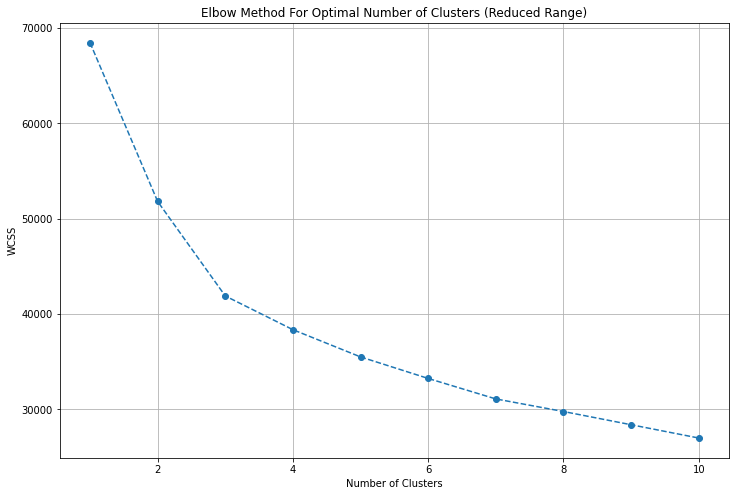

In [117]:
# plot the wcss values against the respective number of clusters
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced,marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

- The elbow point seems to be at n =  3

In [118]:
n_clusters = 3

# create and train another model with the specified no. of clusters 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# predict the cluster numbers for each row in the data
cluster_assignments = kmeans.predict(scaled_data)

/home/shwetank/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,additional_room,floor_num,facing,age_possession,nearby_locations,furnish_details,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,AC,Chimney,Dining Table,Washing Machine,Bed,Curtains,Water Purifier,TV,Light,Stove,Geyser,Microwave,Wardrobe,Fridge,Exhaust Fan,Modular Kitchen,Sofa,Fan
0,flat,m3m heights,sector 65,2.5,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,not available,19.0,NaN,Undefined,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN,1828.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [125]:
# drop the individual furnishing category columns and add a new column for cluster assignments
df = df.iloc[:, :-18]
df['furnishing_type'] = cluster_assignments
df[['furnish_details', 'furnishing_type']].sample(5)

,furnish_details,furnishing_type
783,"['4 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '12 Light', '9 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",1
3241,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2953,NaN,0
461,"['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3383,NaN,0


In [126]:
df['furnishing_type'].value_counts()

0    2501
1    1081
2     221
Name: furnishing_type, dtype: int64

0 $\rightarrow$ **unfurnished** <br>
1 $\rightarrow$ **semifurnished** <br>
2 $\rightarrow$ **furnished** <br>

### 5. Features

In [158]:
df[['society', 'features']].sample(5)

,society,features
1035,emaar emerald hills,NaN
1096,parsvnath exotica,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1415,signature global park,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1205,international city by sobha phase 1,"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3318,supertech hues,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Piped-gas', 'Security Personnel', 'Maintenance Staff', 'Internet/wi-fi connectivity', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Shopping Centre', 'Rain Water Harvesting']"


In [159]:
# check for null values in the features columns
df['features'].isnull().sum()

635

In [160]:
# load the apartments data into a df
df_apart = pd.read_csv('data/gurgaon/flats/apartments.csv')

In [162]:
df_apart.head(5)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"
3,Sobha City,"2, 3, 4 BHK Apartment in S

In [163]:
df_apart['PropertyName'] = df_apart['PropertyName'].str.lower()

In [164]:
# create a df containing all the rows in which features column of df is null
df_temp = df[df['features'].isnull()]
df_temp.shape

(635, 26)

In [165]:
# merge the temp df with the apartment df and extract the TopFacilities column
x = df_temp.merge(df_apart, left_on='society', right_on='PropertyName', how='left')['TopFacilities']

In [166]:
# fill the null rows in features column using the values obtained above
df.loc[df_temp.index, 'features'] = x.values
df['features'].isnull().sum()

481

In [167]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [168]:
# convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# convert the binary list into a dataframe
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [169]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2011,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [174]:
features_binary_df.shape[0] == df.shape[0]

True

In [176]:
# assign weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [177]:
len(luxury_score)

3803

In [178]:
df['luxury_score'] = luxury_score
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,additional_room,floor_num,facing,age_possession,nearby_locations,furnish_details,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
3768,flat,the nav manesar apartment,sector 1,0.85,3953.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3+,servant room,5.0,North-East,Moderately Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'SP Infocity', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', ""Domino's Pizza"", 'Cafe Coffee Day', 'Pizza Hut', 'Pind Baluchi', 'Moti Mahal', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']",NaN,"['Feng Shui / Vaastu Compliant', 'Piped-gas']",2150.0,NaN,NaN,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Piped-gas]",5
3386,house,emaar mgf marbella,sector 66,12.00,38095.0,3150.0,Plot area 350(292.64 sq.m.),5,6,3+,"servant room,pooja room",4.0,North-East,New Property,"['Sector 55-56 Rapid Metro Station', 'HUB 66', 'NH 48', 'Hasanpur', 'Gurugram University', 'Delhi Public School', 'Park Hospital', 'Indira Gandhi International Airport', 'Sealdah', 'Vatika Business Centre', 'The Oberoi', 'De Adventure Park', 'DLF Golf and Country Club', 'Tau DeviLal Sports Complex']","['9 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'Maintenance Staff', 'Separate entry for servant room', 'Park', 'Visitor Parking']",NaN,350.0,NaN,0,1,0,1,0,0,"[Private Garden / Terrace, Maintenance Staff, Separate entry for servant room, Park, Visitor Parking]",38
3055,flat,experion windchants,sector 112,4.25,11294.0,3763.0,Super Built up area 3763(349.59 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),3,5,2,"pooja room,servant room",15.0,South,Relatively New,"['Ansal Plaza', 'Dwaraka Expressway', 'First Step Play School', 'Sri Ma Montessori International', 'Jai Sai Ram Hospital', 'Park Hospital', 'IGI Airport', 'Gurgaon Railway Station']","['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3763.0,3000.0,2800.0,0,1,0,1,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",72
2458,flat,signature global orchard avenue,sector 93,0.85,14237.0,597.0,Built Up area: 597 (55.46 sq.m.),2,2,0,not available,10.0,NaN,Undefined,"['JMS Crosswalk Mall', 'Reliance Trends Newtown Square Mall', 'Pataudi Rd, Gurugram', 'RPS International School', 'Euro Intl School, Sector 84, Gurugram', 'SGT University', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi International Airport']","['1 Light', 'No AC', 'No Bed

In [179]:
# drop unnecessary columns
df.drop(columns=['nearby_locations', 'furnish_details', 'features', 'features_list', 'additional_room'], inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,floor_num,facing,age_possession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2236,flat,experion the heartsong,sector 108,0.90,7014.0,1283.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2,3,3,2.0,South,Relatively New,1283.0,978.23,734.43,0,1,0,0,0,0,94
2875,flat,mittal cosmos executive apartments,sector 2,0.75,6550.0,1145.0,Super Built up area 1145(106.37 sq.m.)Built Up area: 1100 sq.ft. (102.19 sq.m.),2,2,2,15.0,NaN,Old Property,1145.0,1100.00,NaN,0,0,0,0,0,1,42
1772,flat,corona optus,sector 37c,1.25,8928.0,1400.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,2.0,South-East,Relatively New,1735.0,NaN,1400.00,1,0,0,0,0,0,49
3680,flat,ireo victory valley,sector 67,3.05,12650.0,2411.0,Super Built up area 2411(223.99 sq.m.)Carpet area: 1688 sq.ft. (156.82 sq.m.),3,3,3+,21.0,South-West,Relatively New,2411.0,NaN,1688.00,0,1,0,0,0,1,157
1286,house,vatika independent floors,sector 82,1.40,8235.0,1700.0,Plot area 1700(157.94 sq.m.),3,3,2,3.0,North-West,New Property,NaN,1700.00,NaN,0,0,0,1,0,0,61


In [180]:
df.shape

(3803, 23)

In [181]:
df.to_csv('gurgaon_properties_fe.csv', index=False)